<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/DeepLearning/Assignment_41/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Conv2D ,MaxPooling2D , Flatten
import matplotlib.pyplot as plt


In [2]:
dataset = tf.keras.datasets.cifar100
(X_train, Y_train) , (X_test, Y_test) = dataset.load_data()
(x_train, y_train) , (x_test, y_test) = dataset.load_data()

169017344/169001437 [==============================] - 11s 0us/step


In [3]:
print(X_train.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)

(50000, 32, 32, 3)
0 255 uint8
0 99 int64


[8]


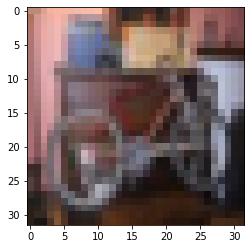

In [4]:
plt.imshow(X_train[4900] )
print(Y_train[4900])

**MPL (Machine Learning) For cifar100** 




In [5]:
X_train = X_train.reshape(50000,3072)
#print(X_train.shape)

In [6]:
model = tf.keras.models.Sequential([
        Dense(64, input_dim = 3072, activation='relu'),
        Dense(32, activation='relu'),
        Dense(100, activation='softmax'),
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [8]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 3ms/step - loss: 6.6668 - accuracy: 0.0085
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.6073 - accuracy: 0.0086
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.6495 - accuracy: 0.0091
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.6059 - accuracy: 0.0090
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 4.6059 - accuracy: 0.0087


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3300      
Total params: 202,052
Trainable params: 202,052
Non-trainable params: 0
_________________________________________________________________


In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
X_test = X_test.reshape(10000,3072)

In [12]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.6052 - accuracy: 0.0100


[4.605196475982666, 0.009999999776482582]

**CNN + MLP (Deep Learning) For cifar100**

In [13]:
dataset = tf.keras.datasets.cifar100
(x_train, y_train) , (x_test, y_test) = dataset.load_data()

In [14]:
x_train , x_test = x_train /255.0 , x_test / 255.0

In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], x_train.shape[2],3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],3)


print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [34]:
model = tf.keras.models.Sequential([                             
        Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),
])

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [36]:
model.fit(x_train , y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - loss: nan - accuracy: 0.0100

In [37]:
Accuracy = model.evaluate(x_test , y_test)
print ("Deep Accuracy ==========>" , Accuracy)

313/313 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0100
Deep Accuracy ==========> [nan, 0.009999999776482582]
